In [1]:
%matplotlib inline

# Imports
import gc
import matplotlib.pyplot as plt
import numpy
import os
import pandas
import scipy
import scipy.spatial.distance
import seaborn
seaborn.set_style("darkgrid")

In [2]:
# Setup PLOS ONE font dictionary
title_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 14}
axis_plos_one_fontdict = {'fontname': "Serif", 'fontsize': 12}

In [3]:
# Read filing data
filing_df = pandas.read_csv("../data/input/all_filing_list.csv", low_memory=False)
filing_df.loc[:, "year_filed"] = filing_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))
print(filing_df.shape)

(181755, 13)


In [4]:
# Read agency data
agency_df = pandas.read_csv("../data/output/agency_result_data.csv.gz", compression="gzip")
agency_df.loc[:, "year_filed"] = agency_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))

In [5]:
# Read act data
act_df = pandas.read_csv("../data/output/clean_act_result_data.csv.gz", compression="gzip", low_memory=False)
act_df.loc[:, "year_filed"] = act_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))
print(act_df.shape)

act_df = act_df.loc[act_df["match_score"] > 0.0, :]
print(act_df.shape)

(3606888, 14)
(3392667, 14)


## Figure 1

In [6]:
# Get counts per year
agency_per_year = agency_df.groupby(["year_filed", "agency"])["company_cik"].count()\
    .unstack().fillna(0).astype(int)
agency_per_year.to_csv("../data/output/agency_count_per_year.csv", encoding="utf-8")
agency_per_year.head()

agency,Advanced Research Projects Agency,Alcohol and Tobacco Tax and Trade Bureau,American Battle Monuments Commission,Appalachian Regional Commission,Arctic Research Commission,Bonneville Power Administration,Census Bureau,Central Intelligence Agency,Commodity Futures Trading Commission,Consumer Financial Protection Bureau,...,Social Security Administration,Southeastern Power Administration,Southwestern Power Administration,Substance Abuse and Mental Health Services Administration,Trade and Development Agency,Transportation Security Administration,Veterans Benefits Administration,Veterans Health Administration,Western Area Power Administration,White House Communications Agency
year_filed,,,,,,,,,,,,,,,,,,,,,
1994,2,0,0,0,0,1,2,0,3,0,...,2,0,0,0,0,0,0,0,0,0
1995,7,0,0,0,0,7,12,3,22,0,...,11,0,0,2,0,0,0,0,0,0
1996,16,0,0,0,0,36,33,5,63,0,...,18,5,0,6,0,0,0,0,7,1
1997,46,0,0,0,0,33,82,6,113,0,...,32,6,1,6,1,0,0,0,8,0
1998,54,0,0,0,0,41,68,7,117,0,...,38,34,1,4,0,0,1,0,4,0


In [7]:
# Group data by company-year
act_df.loc[:, "year_filed"] = act_df.loc[:, "date_filed"].apply(lambda x: int(x.split("-")[0]))
act_per_year = act_df.groupby(["year_filed", "clean_act_name"])["company_cik"].count()\
    .unstack().fillna(0).astype(int)
act_per_year.to_csv("../data/output/act_count_per_year.csv", encoding="utf-8")
act_per_year.head()

clean_act_name,21st Century Communications And Video Accessibility,Accountable Pipeline Safety and Partnership,Age Discrimination In Employment,Air Transportation Safety And System Stabilization,Airline Deregulation,Airport Noise And Capacity,Alternative Energy Portfolio Standards,American Clean Energy And Security,American Jobs Creation,American Microturbine Manufacturing and Clean Energy Deployment,...,Usec Privatization,Veterans Health Care,Virginia Electric Utility Restructuring,Water Power,Water Quality,Work Incentives Improvement,Worker Adjustment And Retraining Notification,"Worker, Homeownership, And Business Assistance","Worker, Retiree, And Employer Recovery",Year 2000 Information And Readiness Disclosure
year_filed,,,,,,,,,,,,,,,,,,,,,
1994,0,0,0,0,1,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0
1995,0,0,6,0,15,16,0,0,0,0,...,0,5,0,8,2,0,2,0,0,0
1996,0,6,20,0,24,15,0,1,0,0,...,0,2,0,155,5,0,5,0,0,0
1997,0,6,34,0,21,20,0,1,5,0,...,0,3,5,215,12,0,11,0,0,0
1998,0,10,59,2,23,23,0,1,7,0,...,67,4,0,206,5,0,11,0,0,22


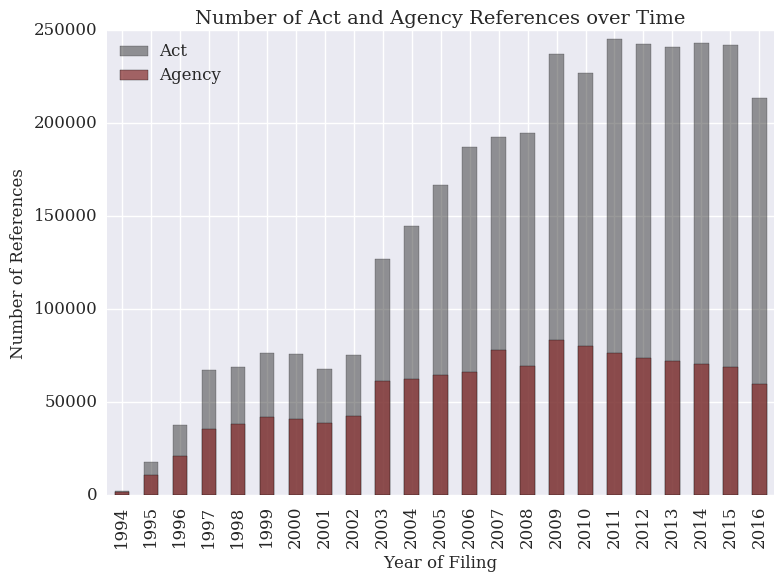

In [8]:
# Build normalize dataframe
agency_count_per_year = agency_per_year.sum(axis=1)
total_act_per_year = act_per_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
total_act_per_year.plot(kind="bar", color="#343434", alpha=0.5, ax=ax)
agency_count_per_year.plot(kind="bar", color="#893434", alpha=0.75, ax=ax)
plt.title("Number of Act and Agency References over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=axis_plos_one_fontdict)
ax.set_xticklabels(list(map(str, total_act_per_year.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of References", fontdict=axis_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 250000, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
plt.tight_layout()
plt.legend(("Act", "Agency"), loc="best")

# Cleanup legend font
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=axis_plos_one_fontdict["fontsize"])
plt.setp(ltext, fontname=axis_plos_one_fontdict["fontname"])

# Write to figure files
f.savefig(os.path.join("../figures/", "measuring_temperature_act_agency_references.png"), dpi=300)
f.savefig(os.path.join("../figures/", "measuring_temperature_act_agency_references.pdf"), dpi=300)

## Figure 2

In [9]:
# Get number of unique filings and CIKs per year
references_per_year = act_per_year.sum(axis=1)
filings_per_year = act_df.groupby(["year_filed"])["segment_id"].nunique()
cik_per_year = act_df.groupby(["year_filed"])["company_cik"].nunique()

# Build normalize dataframe
act_per_filing_year = act_per_year.copy()
for i in act_per_filing_year.index:
    act_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_act_per_filing_year = act_per_filing_year.sum(axis=1)
    
# Build normalize dataframe
agency_per_filing_year = agency_per_year.copy()
for i in act_per_filing_year.index:
    agency_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_agency_per_filing_year = agency_per_filing_year.sum(axis=1)

# Merge and output
df = pandas.concat([average_act_per_filing_year, average_agency_per_filing_year], axis=1)
df.columns = ["act", "agency"]
df.to_csv("../data/output/figure2_data.csv")

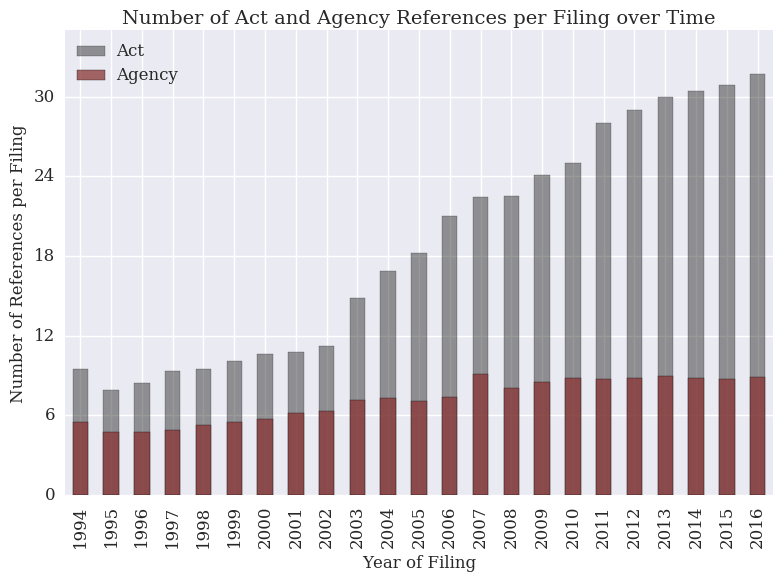

In [10]:
# Build normalize dataframe
act_per_filing_year = act_per_year.copy()
for i in act_per_filing_year.index:
    act_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_act_per_filing_year = act_per_filing_year.sum(axis=1)
    
# Build normalize dataframe
agency_per_filing_year = agency_per_year.copy()
for i in act_per_filing_year.index:
    agency_per_filing_year.loc[i, :] /= filings_per_year.loc[i]
average_agency_per_filing_year = agency_per_filing_year.sum(axis=1)
    
f, ax = plt.subplots(figsize=(8, 6))
average_act_per_filing_year.plot(kind="bar", color="#343434", alpha=0.5, ax=ax)
average_agency_per_filing_year.plot(kind="bar", color="#893434", alpha=0.75, ax=ax)
plt.title("Number of Act and Agency References per Filing over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=axis_plos_one_fontdict)
ax.set_xticklabels(list(map(str, total_act_per_year.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of References per Filing", fontdict=axis_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 30, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
plt.tight_layout()
plt.legend(("Act", "Agency"), loc="best")

# Cleanup legend font
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=axis_plos_one_fontdict["fontsize"])
plt.setp(ltext, fontname=axis_plos_one_fontdict["fontname"])

# Write to figure files
f.savefig(os.path.join("../figures/", "measuring_temperature_act_agency_rate.png"), dpi=300)
f.savefig(os.path.join("../figures/", "measuring_temperature_act_agency_rate.pdf"), dpi=300)

## Figure 3

In [11]:
filing_act_count_df = act_df.groupby(["year_filed", "segment_id"])["clean_act_name"].nunique().unstack()
filing_act_mean_ts = filing_act_count_df.mean(axis=1)

In [12]:
filing_agency_count_df = agency_df.groupby(["year_filed", "segment_id"])["agency"].nunique().unstack()
filing_agency_mean_ts = filing_agency_count_df.mean(axis=1)

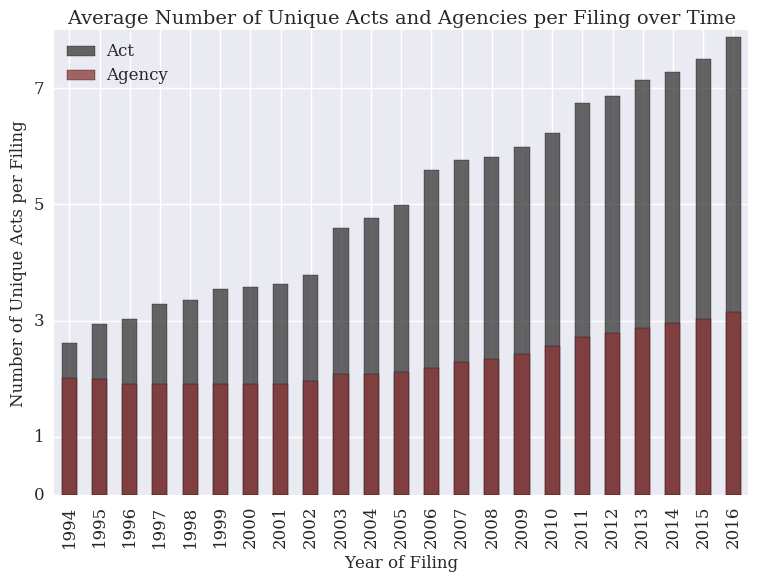

In [13]:
# Plot
f, ax = plt.subplots(figsize=(8, 6))
filing_act_mean_ts.plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
filing_agency_mean_ts.plot(kind="bar", color="#893434", alpha=0.75, ax=ax)

plt.title("Average Number of Unique Acts and Agencies per Filing over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=axis_plos_one_fontdict)
ax.set_xticklabels(list(map(str, filing_act_mean_ts.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Number of Unique Acts per Filing", fontdict=axis_plos_one_fontdict)
y_tick_list = numpy.linspace(0, filing_act_mean_ts.max(), 5).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
f.tight_layout()
plt.legend(("Act", "Agency"), loc="best")

# Cleanup legend font
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=axis_plos_one_fontdict["fontsize"])
plt.setp(ltext, fontname=axis_plos_one_fontdict["fontname"])

# Write to figure files
f.savefig(os.path.join("../figures/", "measuring_temperature_act_agency_unique_rate.png"), dpi=300)
f.savefig(os.path.join("../figures/", "measuring_temperature_act_agency_unique_rate.pdf"), dpi=300)

## Figure 4

In [14]:
# Mean pairwise act distance across time

average_pairwise_act_distance_list = []
year_list = []

for year, year_act_df in act_df.groupby("year_filed"):
    year_company_profile_df = (year_act_df.groupby(["company_cik", "clean_act_name"])["segment_id"].count().unstack() > 0).astype(int)
    P = scipy.spatial.distance.pdist(year_company_profile_df.values, metric="cityblock")
    average_pairwise_act_distance_list.append(numpy.mean(P))
    year_list.append(year)

In [15]:
# Mean pairwise agency distance across time

average_pairwise_agency_distance_list = []
year_list = []

for year, year_agency_df in agency_df.groupby("year_filed"):
    year_company_profile_df = (year_agency_df.groupby(["company_cik", "agency"])["segment_id"].count().unstack() > 0).astype(int)
    P = scipy.spatial.distance.pdist(year_company_profile_df.values, metric="cityblock")
    average_pairwise_agency_distance_list.append(numpy.mean(P))
    year_list.append(year)

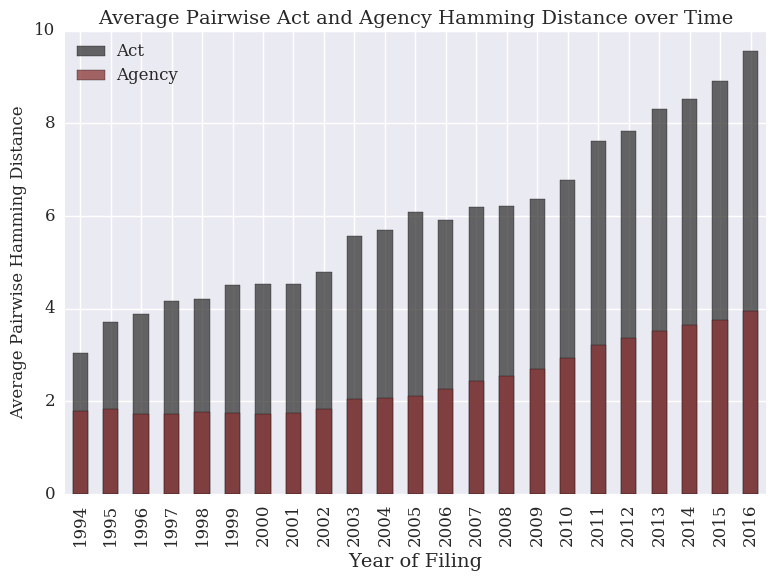

In [16]:
# Build distance matrix
average_profile_act_distance_ts = pandas.DataFrame(average_pairwise_act_distance_list)
average_profile_act_distance_ts.columns = ["distance"]
average_profile_act_distance_ts.index = year_list

average_profile_agency_distance_ts = pandas.DataFrame(average_pairwise_agency_distance_list)
average_profile_agency_distance_ts.columns = ["distance"]
average_profile_agency_distance_ts.index = year_list

# Plot
f, ax = plt.subplots(figsize=(8, 6))
average_profile_act_distance_ts["distance"].plot(kind="bar", color="#343434", alpha=0.75, ax=ax)
average_profile_agency_distance_ts["distance"].plot(kind="bar", color="#893434", alpha=0.75, ax=ax)
plt.title("Average Pairwise Act and Agency Hamming Distance over Time", fontdict=title_plos_one_fontdict)

# x-axis
plt.xlabel("Year of Filing", fontdict=title_plos_one_fontdict)
ax.set_xticklabels(list(map(str, average_profile_act_distance_ts.index)), fontdict=axis_plos_one_fontdict)

# y-axis
plt.ylabel("Average Pairwise Hamming Distance", fontdict=axis_plos_one_fontdict)
y_tick_list = numpy.linspace(0, 10, 6).astype(numpy.int32)
ax.set_yticks(y_tick_list)
ax.set_yticklabels(y_tick_list, fontdict=axis_plos_one_fontdict)
f.tight_layout()
plt.legend(("Act", "Agency"), loc="best")

# Cleanup legend font
leg = plt.gca().get_legend()
ltext  = leg.get_texts()
plt.setp(ltext, fontsize=axis_plos_one_fontdict["fontsize"])
plt.setp(ltext, fontname=axis_plos_one_fontdict["fontname"])

# Write to figure files
f.savefig(os.path.join("../figures/", "measuring_temperature_average_hamming_distance.png"), dpi=300)
f.savefig(os.path.join("../figures/", "measuring_temperature_average_hamming_distance.pdf"), dpi=300)

## Figure 5

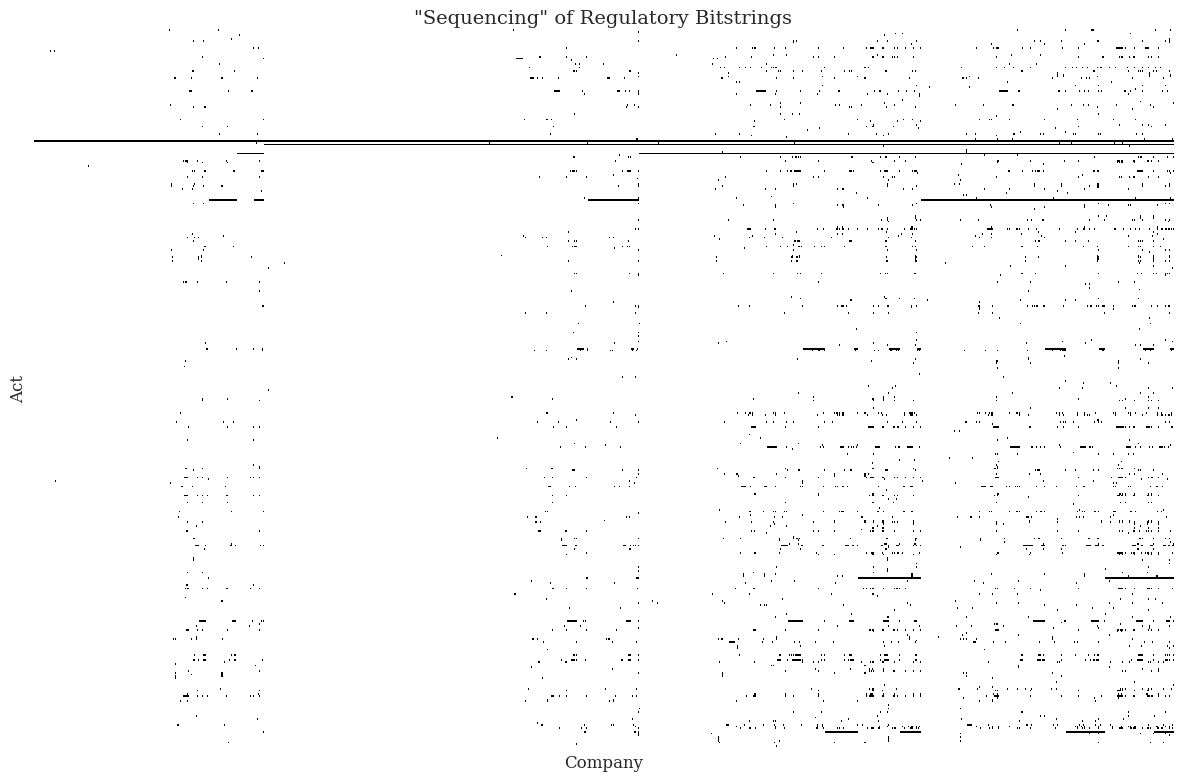

In [17]:
f, ax = plt.subplots(figsize=(12, 8))
df = (act_df.groupby(["company_cik", "clean_act_name"])["segment_id"].count().unstack().fillna(0) > 0).astype(int)
sort_columns = df.sum().sort_values(ascending=False).head(100).index.tolist()
sort_rows = df.T.sum().sort_values(ascending=False).head(100).index.tolist()
sorted_matrix = df.sort_values(sort_columns)
#sorted_matrix = sorted_matrix.T.sort_values(sort_rows).T
_ = ax.pcolorfast(sorted_matrix.values.T)
_ = ax.set_xticks(())
_ = ax.set_yticks(())
_ = ax.set_xlabel("Company", fontdict=axis_plos_one_fontdict)
_ = ax.set_ylabel("Act", fontdict=axis_plos_one_fontdict)
_ = ax.set_title("\"Sequencing\" of Regulatory Bitstrings", fontdict=title_plos_one_fontdict)
_ = ax.grid("off")
f.tight_layout()

# Write to figure files
f.savefig(os.path.join("../figures/", "measuring_temperature_regulatory_bitstring_sequence.png"), dpi=300)
f.savefig(os.path.join("../figures/", "measuring_temperature_regulatory_bitstring_sequence.pdf"), dpi=300)

In [18]:
for year, year_act_df in act_df.groupby("year_filed"):
    year_company_profile_df = (year_act_df.groupby(["company_cik", "clean_act_name"])["segment_id"].count().unstack() > 0).astype(int)
    if year == 1994:
        break
    
print(year)

# Get last distance matrix
df = (year_act_df.groupby(["company_cik", "clean_act_name"])["segment_id"].count().unstack().fillna(0) > 0).astype(int)
sort_columns = df.sum().sort_values(ascending=False).index.tolist()
sorted_matrix = df.sort_values(sort_columns)

distance_vector = scipy.spatial.distance.pdist(sorted_matrix.values, metric="cityblock")
distance_matrix = scipy.spatial.distance.squareform(distance_vector)

1994


In [19]:
distance_df = pandas.DataFrame(distance_matrix, columns=sorted_matrix.index, index=sorted_matrix.index)
sorted_distance_df = distance_df.sort_values(distance_df.columns.tolist())
sorted_distance_df = sorted_distance_df.T.sort_values(distance_df.index.tolist()).T
#sorted_distance_df = distance_df

228


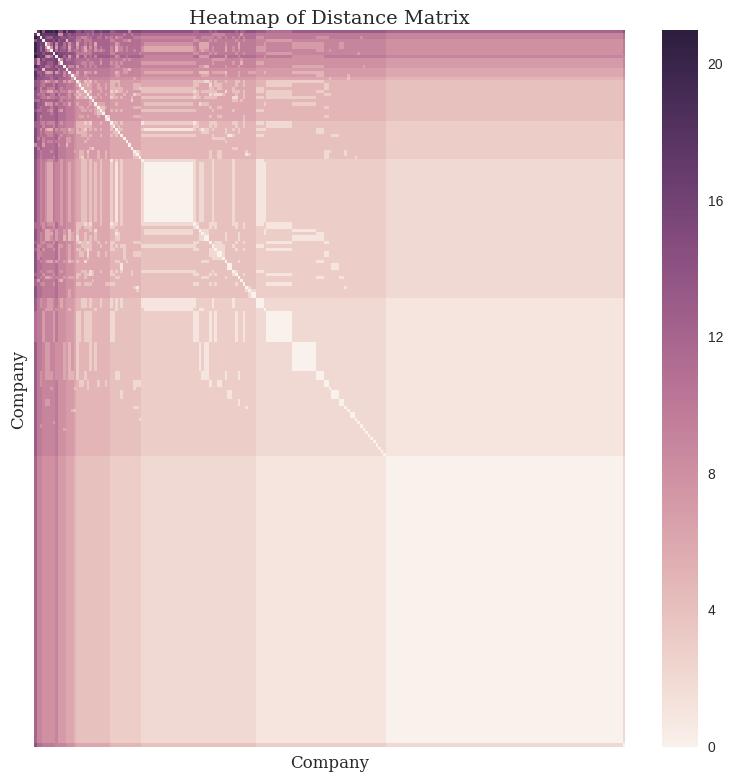

In [20]:
# Get size
N = sorted_distance_df.shape[0]
print(N)

# Setup matrix
X = sorted_distance_df.values[-N:-1, -N:-1]
#X[numpy.tril_indices_from(X)] = numpy.nan

# Plot
f, ax = plt.subplots(figsize=(8, 8))
#_ = ax.pcolorfast(X)
_ = seaborn.heatmap(X, ax=ax)

# Label
_ = ax.set_xticks(())
_ = ax.set_xlabel("Company", fontdict=axis_plos_one_fontdict)
_ = ax.set_yticks(())
_ = ax.set_ylabel("Company", fontdict=axis_plos_one_fontdict)
_ = ax.set_title("Heatmap of Distance Matrix", fontdict=title_plos_one_fontdict)
_ = ax.invert_xaxis()
_ = ax.invert_yaxis()
f.tight_layout()

# Write to figure files
f.savefig(os.path.join("../figures/", "measuring_temperature_heatmap_distance.png"), dpi=300)
f.savefig(os.path.join("../figures/", "measuring_temperature_heatmap_distance.pdf"), dpi=300)

## Table Data 

In [21]:
table_year_list = [1995, 2000, 2005, 2010, 2015]

t = pandas.concat([total_act_per_year.loc[table_year_list],
               average_act_per_filing_year.loc[table_year_list]
              ], axis=1).round(1)

In [22]:
print(t.to_latex())

\begin{tabular}{lrr}
\toprule
{} &       0 &     1 \\
year\_filed &         &       \\
\midrule
1995       &   17672 &   7.9 \\
2000       &   75851 &  10.6 \\
2005       &  166518 &  18.2 \\
2010       &  227210 &  25.0 \\
2015       &  242107 &  30.8 \\
\bottomrule
\end{tabular}



In [23]:
table_year_list = [1995, 2000, 2005, 2010, 2015]

t = pandas.concat([filing_act_mean_ts.loc[table_year_list],
               average_profile_act_distance_ts.loc[table_year_list]
              ], axis=1).round(1)

In [24]:
print(t.to_latex())

\begin{tabular}{lrr}
\toprule
{} &    0 &  distance \\
year\_filed &      &           \\
\midrule
1995       &  2.9 &       3.7 \\
2000       &  3.6 &       4.5 \\
2005       &  5.0 &       6.1 \\
2010       &  6.2 &       6.8 \\
2015       &  7.5 &       8.9 \\
\bottomrule
\end{tabular}

